In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | goderich
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | sistranda
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | kununurra
Processing Record 9 of Set 1 | bargal
City not found. Skipping...
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | lungi
Processing Record 12 of Set 1 | safwah
City not found. Skipping...
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | narsaq
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | pompeia
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | buena vista
Processing Record 22 of Set 1 | taolanaro
Ci

Processing Record 37 of Set 4 | hambantota
Processing Record 38 of Set 4 | mentok
City not found. Skipping...
Processing Record 39 of Set 4 | kidal
Processing Record 40 of Set 4 | cuiluan
Processing Record 41 of Set 4 | saleaula
City not found. Skipping...
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | ilulissat
Processing Record 44 of Set 4 | tres lagoas
Processing Record 45 of Set 4 | yumen
Processing Record 46 of Set 4 | kalawit
Processing Record 47 of Set 4 | ust-nera
Processing Record 48 of Set 4 | russell
Processing Record 49 of Set 4 | carnarvon
Processing Record 50 of Set 4 | rivadavia
Processing Record 1 of Set 5 | kamenka
Processing Record 2 of Set 5 | khasan
Processing Record 3 of Set 5 | imbituba
Processing Record 4 of Set 5 | nikolskoye
Processing Record 5 of Set 5 | oranjemund
Processing Record 6 of Set 5 | kirakira
Processing Record 7 of Set 5 | portoferraio
Processing Record 8 of Set 5 | senno
Processing Record 9 of Set 5 | amparafaravola
Proce

Processing Record 24 of Set 8 | noumea
Processing Record 25 of Set 8 | mahenge
Processing Record 26 of Set 8 | mazagao
Processing Record 27 of Set 8 | doha
Processing Record 28 of Set 8 | roma
Processing Record 29 of Set 8 | fort nelson
Processing Record 30 of Set 8 | libiaz
Processing Record 31 of Set 8 | renqiu
Processing Record 32 of Set 8 | saint-francois
Processing Record 33 of Set 8 | mana
Processing Record 34 of Set 8 | wapakoneta
Processing Record 35 of Set 8 | mayo
Processing Record 36 of Set 8 | valparaiso
Processing Record 37 of Set 8 | leninskoye
Processing Record 38 of Set 8 | ormara
Processing Record 39 of Set 8 | taree
Processing Record 40 of Set 8 | torbay
Processing Record 41 of Set 8 | kita
Processing Record 42 of Set 8 | prince rupert
Processing Record 43 of Set 8 | caarapo
Processing Record 44 of Set 8 | eskil
Processing Record 45 of Set 8 | beian
Processing Record 46 of Set 8 | kirillov
Processing Record 47 of Set 8 | stromness
Processing Record 48 of Set 8 | akyab

Processing Record 13 of Set 12 | pochutla
Processing Record 14 of Set 12 | bonthe
Processing Record 15 of Set 12 | mount isa
Processing Record 16 of Set 12 | sinnamary
Processing Record 17 of Set 12 | canto do buriti
Processing Record 18 of Set 12 | nyurba
Processing Record 19 of Set 12 | shar
Processing Record 20 of Set 12 | namtsy
Processing Record 21 of Set 12 | yeppoon
Processing Record 22 of Set 12 | tecoanapa
Processing Record 23 of Set 12 | saint-malo
Processing Record 24 of Set 12 | portree
Processing Record 25 of Set 12 | irece
Processing Record 26 of Set 12 | nelson bay
Processing Record 27 of Set 12 | martil
Processing Record 28 of Set 12 | naze
Processing Record 29 of Set 12 | sorong
Processing Record 30 of Set 12 | san luis
Processing Record 31 of Set 12 | warqla
City not found. Skipping...
Processing Record 32 of Set 12 | lumphat
Processing Record 33 of Set 12 | bastia
Processing Record 34 of Set 12 | roald
Processing Record 35 of Set 12 | kiama
Processing Record 36 of Se

In [10]:
len(city_data)

584

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,37.00,94,100,10.45,RU,2021-05-26 21:50:54
1,Goderich,43.7501,-81.7165,64.90,88,99,6.91,CA,2021-05-26 21:50:54
2,Tasiilaq,65.6145,-37.6368,41.16,89,100,31.94,GL,2021-05-26 21:47:15
3,Sistranda,63.7256,8.8340,49.96,89,5,23.67,NO,2021-05-26 21:47:54
4,Puerto Ayora,-0.7393,-90.3518,84.16,89,40,8.01,EC,2021-05-26 21:50:55
5,Hobyo,5.3505,48.5268,78.84,78,82,20.33,SO,2021-05-26 21:50:55
6,Hasaki,35.7333,140.8333,64.80,77,100,18.97,JP,2021-05-26 21:50:55
7,Kununurra,-15.7667,128.7333,76.98,50,65,9.22,AU,2021-05-26 21:50:55
8,Avarua,-21.2078,-159.7750,82.45,78,75,8.05,CK,2021-05-26 21:50:56
9,Lungi,9.2212,-12.6831,77.36,86,82,5.64,SL,2021-05-26 21:50:56


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-05-26 21:50:54,71.9167,114.0833,37.00,94,100,10.45
1,Goderich,CA,2021-05-26 21:50:54,43.7501,-81.7165,64.90,88,99,6.91
2,Tasiilaq,GL,2021-05-26 21:47:15,65.6145,-37.6368,41.16,89,100,31.94
3,Sistranda,NO,2021-05-26 21:47:54,63.7256,8.8340,49.96,89,5,23.67
4,Puerto Ayora,EC,2021-05-26 21:50:55,-0.7393,-90.3518,84.16,89,40,8.01
5,Hobyo,SO,2021-05-26 21:50:55,5.3505,48.5268,78.84,78,82,20.33
6,Hasaki,JP,2021-05-26 21:50:55,35.7333,140.8333,64.80,77,100,18.97
7,Kununurra,AU,2021-05-26 21:50:55,-15.7667,128.7333,76.98,50,65,9.22
8,Avarua,CK,2021-05-26 21:50:56,-21.2078,-159.7750,82.45,78,75,8.05
9,Lungi,SL,2021-05-26 21:50:56,9.2212,-12.6831,77.36,86,82,5.64


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

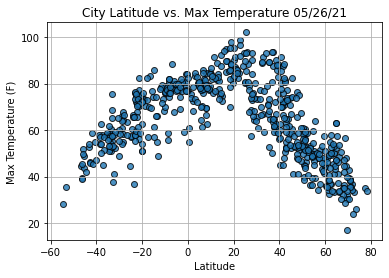

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

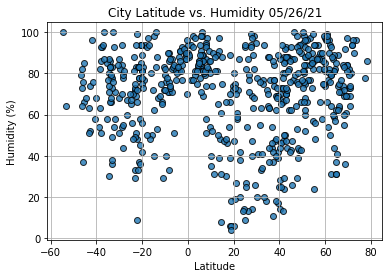

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

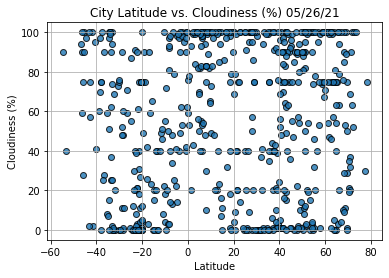

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

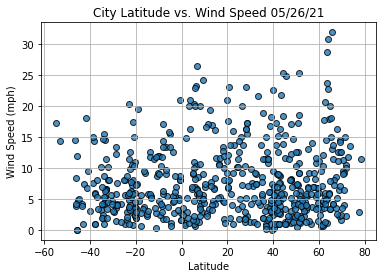

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-05-26 21:50:54,71.9167,114.0833,37.00,94,100,10.45
1,Goderich,CA,2021-05-26 21:50:54,43.7501,-81.7165,64.90,88,99,6.91
2,Tasiilaq,GL,2021-05-26 21:47:15,65.6145,-37.6368,41.16,89,100,31.94
3,Sistranda,NO,2021-05-26 21:47:54,63.7256,8.8340,49.96,89,5,23.67
5,Hobyo,SO,2021-05-26 21:50:55,5.3505,48.5268,78.84,78,82,20.33
...,...,...,...,...,...,...,...,...,...
577,Visnes,NO,2021-05-26 21:53:06,59.3556,5.2242,57.58,82,75,5.75
578,Ponta Delgada,PT,2021-05-26 21:53:06,37.7333,-25.6667,61.52,77,40,11.50
579,Gravdal,NO,2021-05-26 21:53:06,68.1214,13.5031,42.15,83,9,16.33
582,Kavaratti,IN,2021-05-26 21:53:07,10.5669,72.6420,83.23,74,100,16.55


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-05-26 21:50:54,71.9167,114.0833,37.00,94,100,10.45
1,Goderich,CA,2021-05-26 21:50:54,43.7501,-81.7165,64.90,88,99,6.91
2,Tasiilaq,GL,2021-05-26 21:47:15,65.6145,-37.6368,41.16,89,100,31.94
3,Sistranda,NO,2021-05-26 21:47:54,63.7256,8.8340,49.96,89,5,23.67
5,Hobyo,SO,2021-05-26 21:50:55,5.3505,48.5268,78.84,78,82,20.33


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

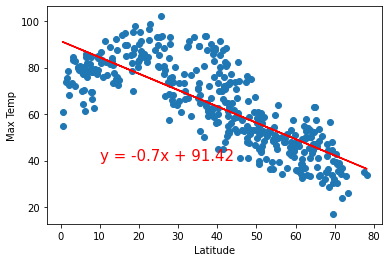

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

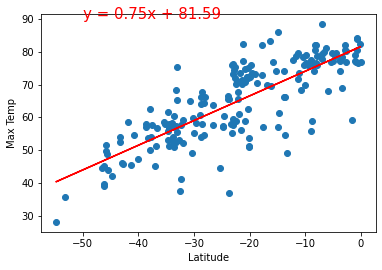

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

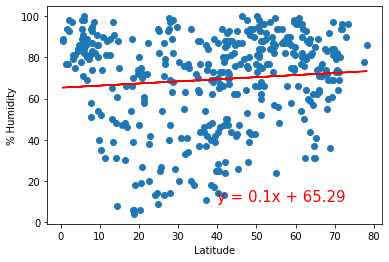

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

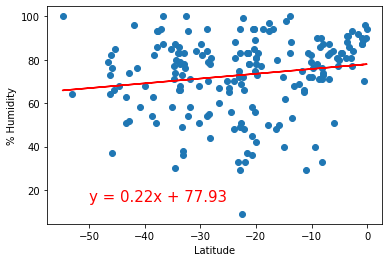

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

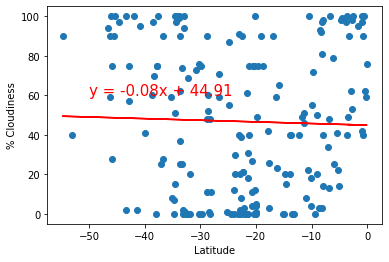

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

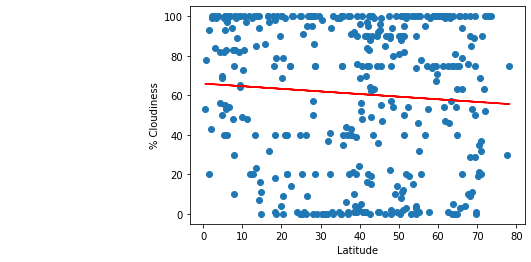

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))